# PLANTILLA EDA

## IMPORTAR PAQUETES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [2]:
ruta_proyecto = 'C:/Users/User/Desktop/DS4B/03_MACHINE_LEARNING/08_CASOS/retail'

Nombres de los ficheros de datos.

In [3]:
nombre_cat = 'cat_resultado_calidad.pickle'
nombre_num = 'num_resultado_calidad.pickle'

Cargar los datos.

In [4]:
cat = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_cat)
num = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_num)

## EDA CATEGÓRICAS

### Análisis estadístico

In [5]:
def frecuencias_cat(df_cat):
    # Asegúrate de que todas las columnas son de tipo 'str' para evitar problemas de comparación
    df_cat = df_cat.astype(str)
    
    resultado = df_cat.apply(lambda x: x.value_counts(normalize=True)) \
                      .T.stack() \
                      .to_frame().reset_index() \
                      .rename(columns={'level_0': 'Variable', 'level_1': 'Valor', 0: "Frecuencia"}) \
                      .sort_values(by=['Variable', 'Frecuencia'])
    return resultado


In [6]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1',
 'event_name_2',
 'event_type_2']

In [7]:
incluir = cat.columns.to_list()
del incluir[2]

In [8]:
frecuencias_cat(cat[incluir])

Variable           Valor  Frecuencia
41  event_name_1    Chanukah End    0.001880
42  event_name_1       Christmas    0.001880
43  event_name_1   Cinco De Mayo    0.001880
48  event_name_1    Father's day    0.001880
61  event_name_1  OrthodoxEaster    0.001880
..           ...             ...         ...
39       weekday         Tuesday    0.142857
40       weekday       Wednesday    0.142857
14          year            2015    0.313910
12          year            2013    0.343045
13          year            2014    0.343045

[84 rows x 3 columns]

### Análisis gráfico

In [9]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

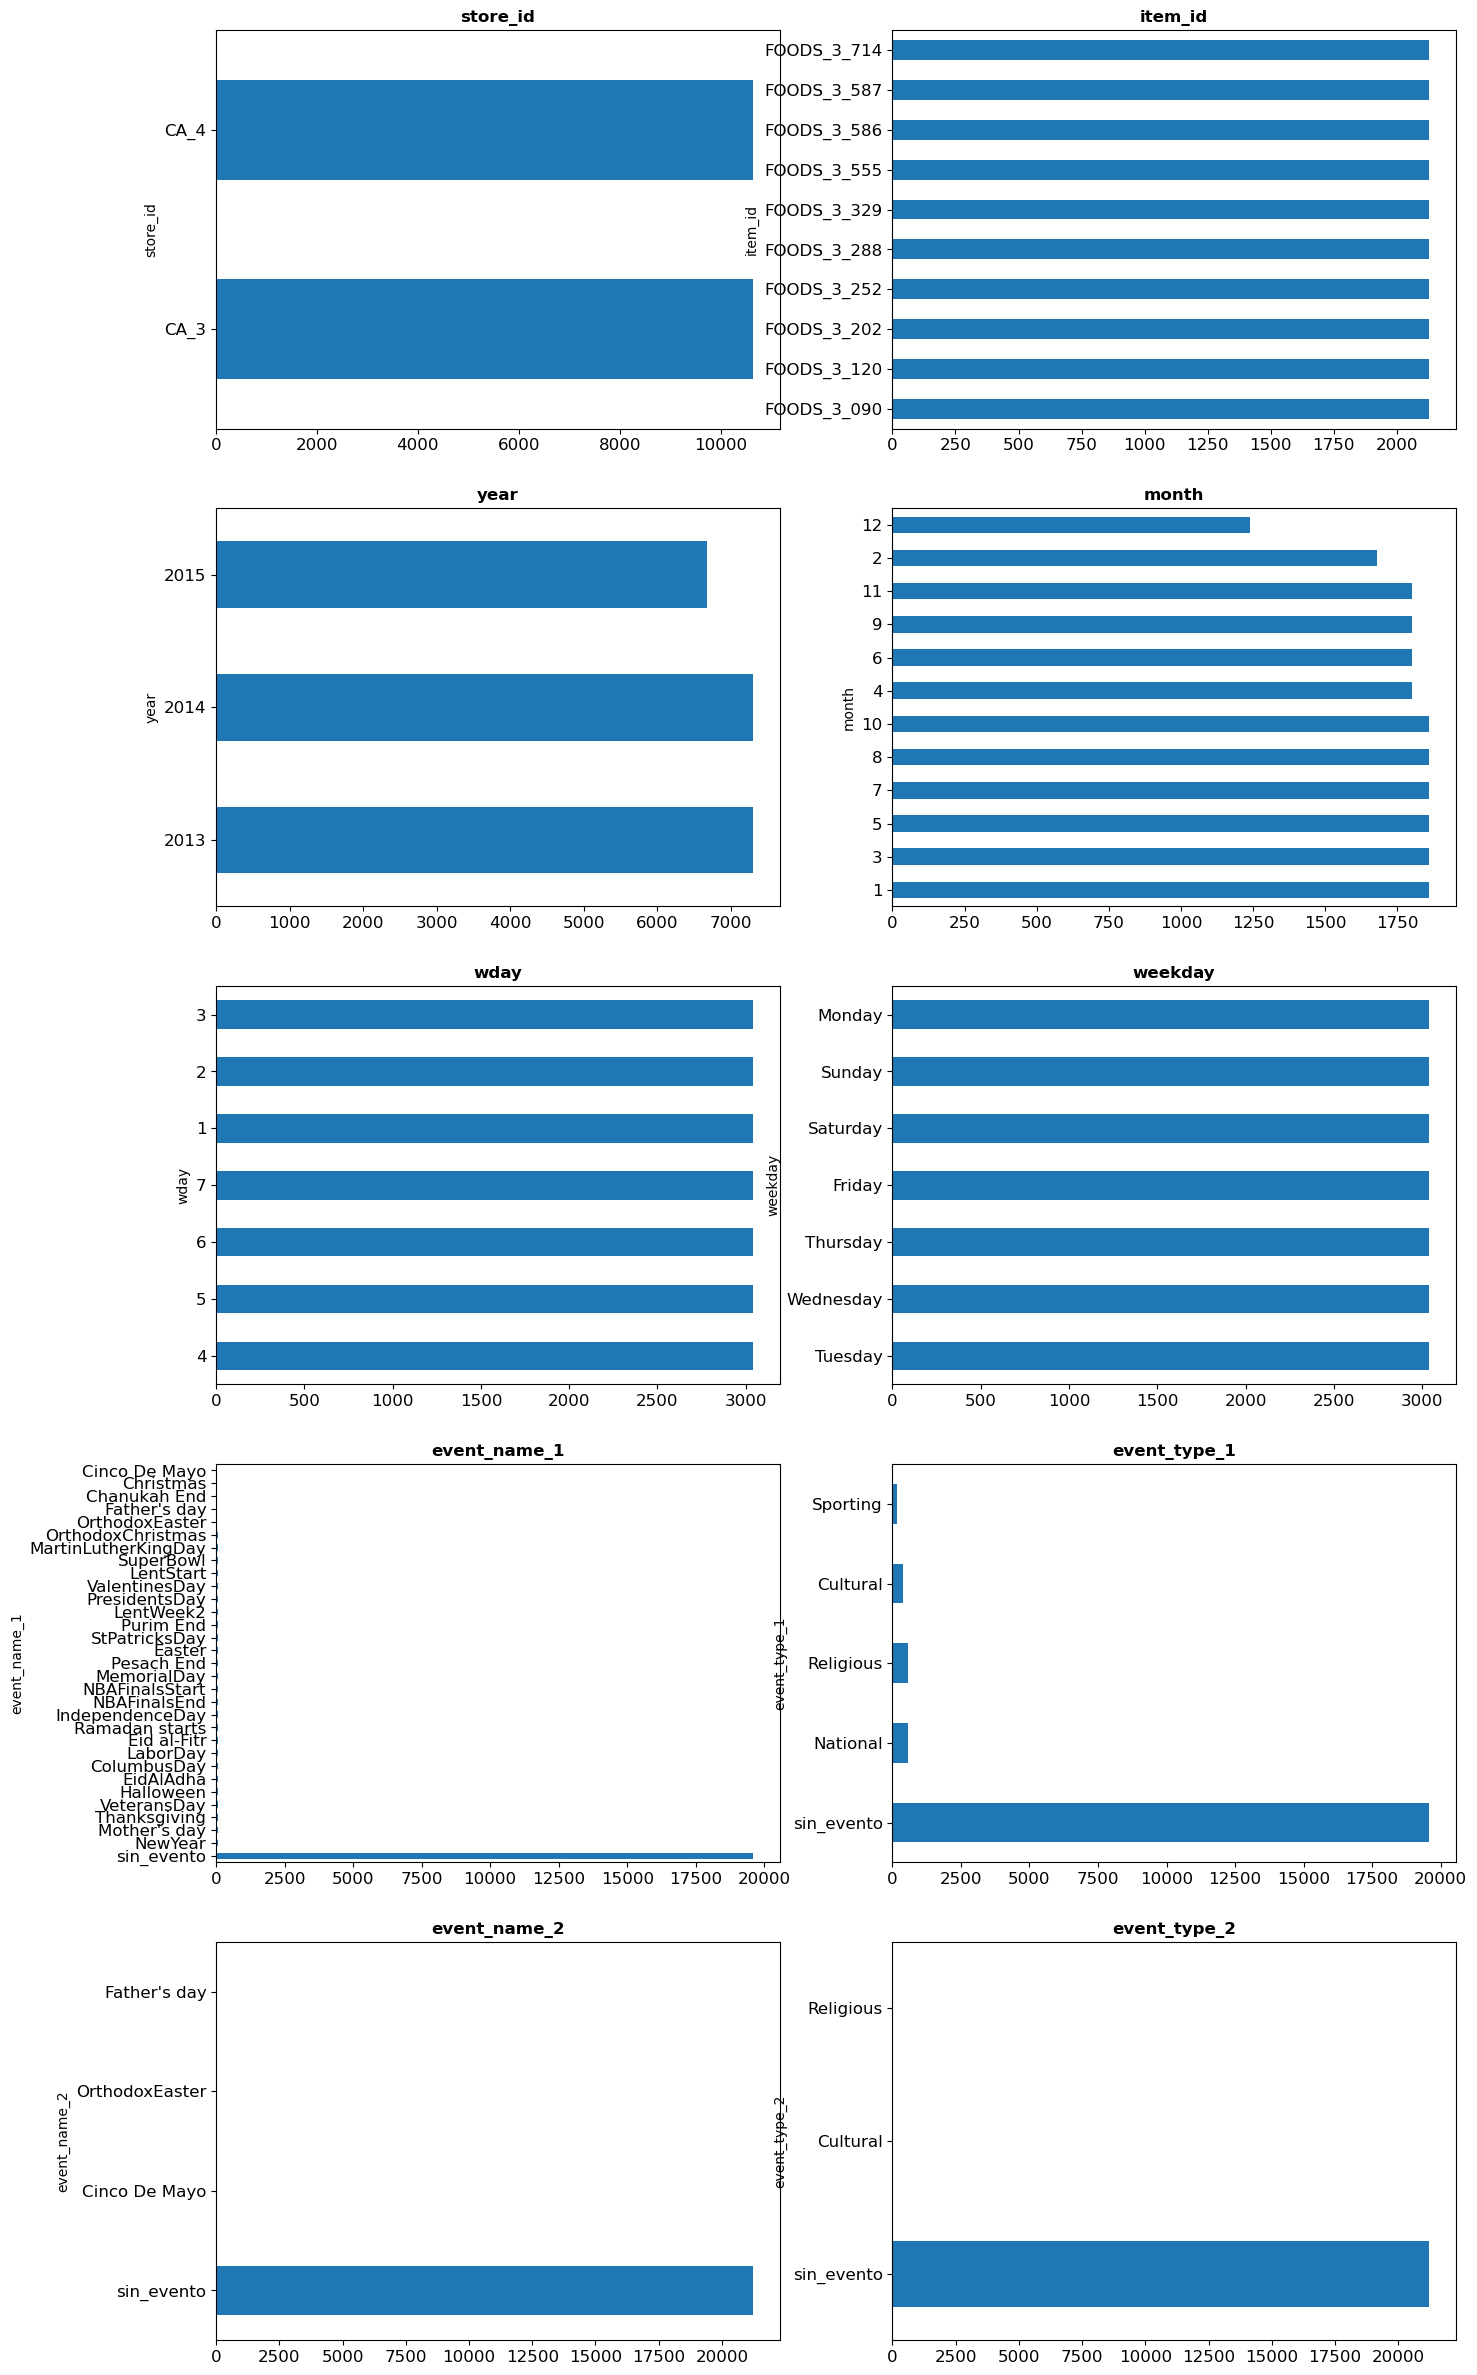

In [10]:
graficos_eda_categoricos(cat[incluir])

## EDA NUMÉRICAS

### Análisis estadístico

In [11]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [12]:
estadisticos_cont(num)

count          mean    median        std      min      25%  \
wm_yr_wk    21280.0  11415.022556  11420.00  82.874752  11249.0  11335.0   
ventas      21280.0     28.874577     18.00  38.988147      0.0      6.0   
sell_price  21280.0      2.394261      1.58   1.236042      1.0      1.5   
en_venta    21280.0      0.996664      1.00   0.057667      0.0      1.0   

                 50%       75%       max  
wm_yr_wk    11420.00  11506.00  11544.00  
ventas         18.00     37.00    763.00  
sell_price      1.58      2.98      4.98  
en_venta        1.00      1.00      1.00

### Análisis gráfico

In [13]:
def graficos_eda_continuas(num):
    
    #Calculamos el número de fila que necesitamos
    from math import ceil
    filas = ceil(num.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

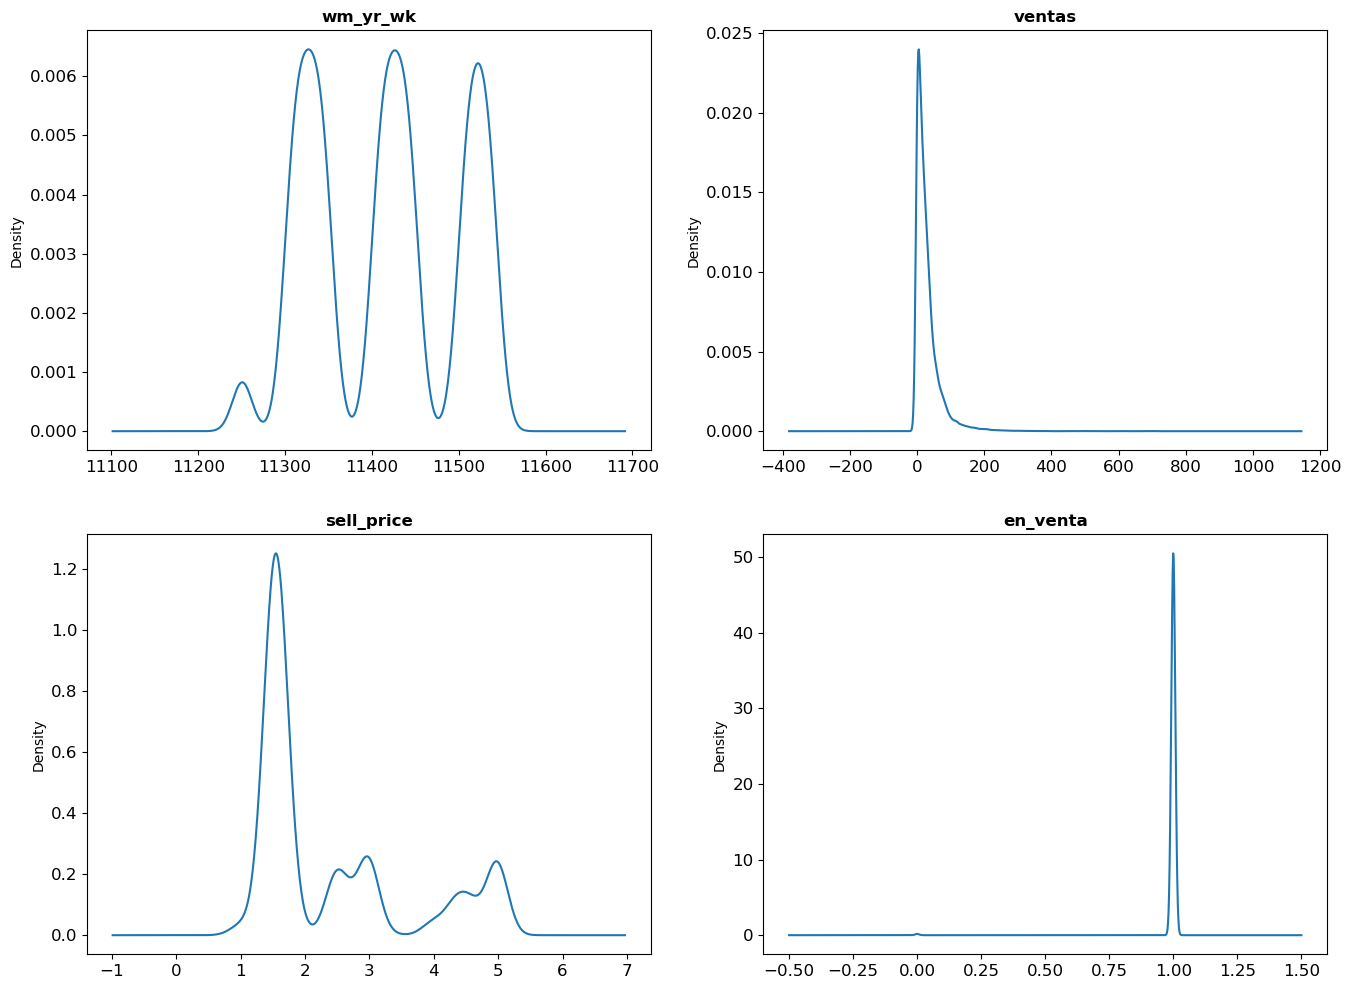

In [14]:
graficos_eda_continuas(num)

#### Tendencia global de las ventas

In [15]:
df = pd.concat([cat,num], axis=1)

df.head(2)

store_id      item_id      d  year month wday  weekday  \
date                                                                
2013-01-01     CA_3  FOODS_3_090  d_704  2013     1    4  Tuesday   
2013-01-01     CA_3  FOODS_3_120  d_704  2013     1    4  Tuesday   

           event_name_1 event_type_1 event_name_2 event_type_2  wm_yr_wk  \
date                                                                       
2013-01-01      NewYear     National   sin_evento   sin_evento     11249   
2013-01-01      NewYear     National   sin_evento   sin_evento     11249   

            ventas  sell_price  en_venta  
date                                      
2013-01-01       0        1.25         1  
2013-01-01       0        4.98         1

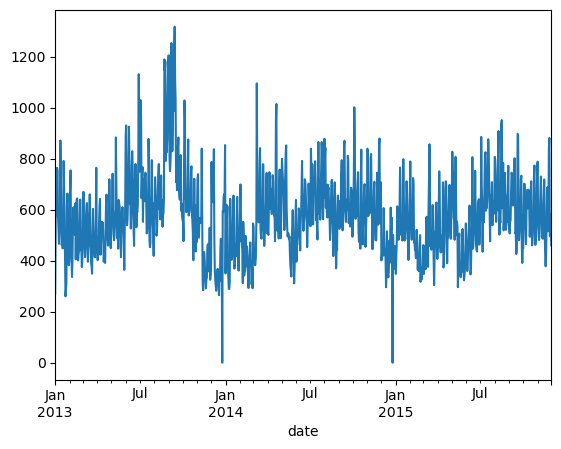

In [16]:
df.groupby('date').ventas.sum().plot();

#### Tendencia de las ventas por tienda

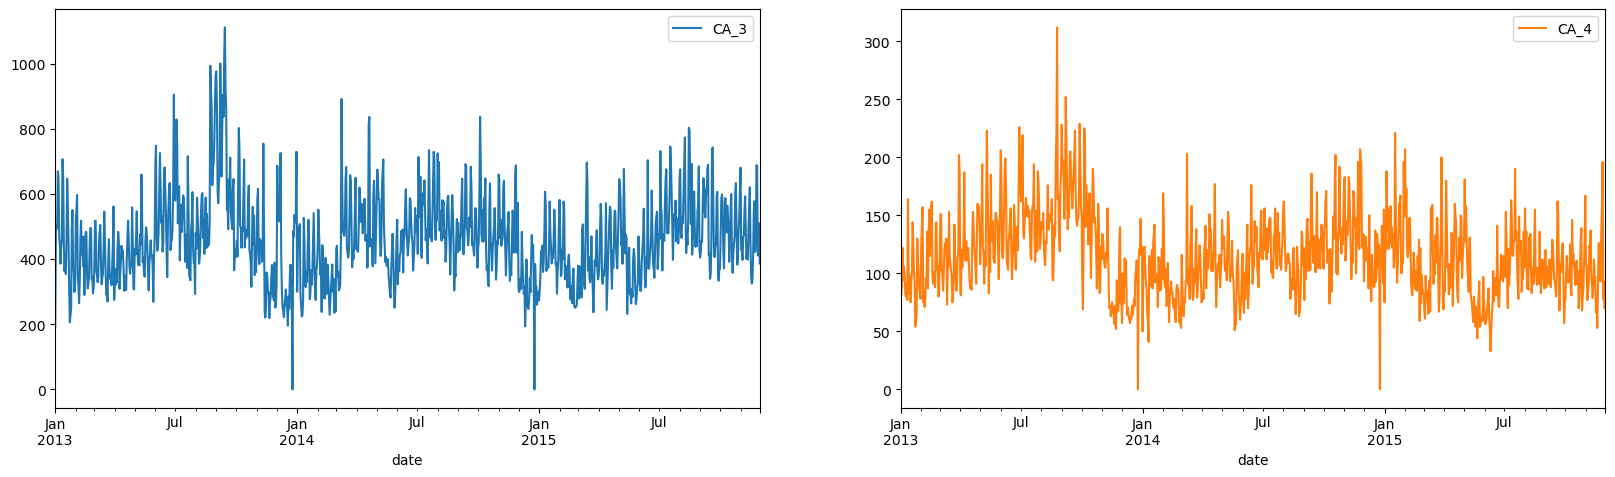

In [17]:
df.groupby(['date','store_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Tendencia de las ventas por producto

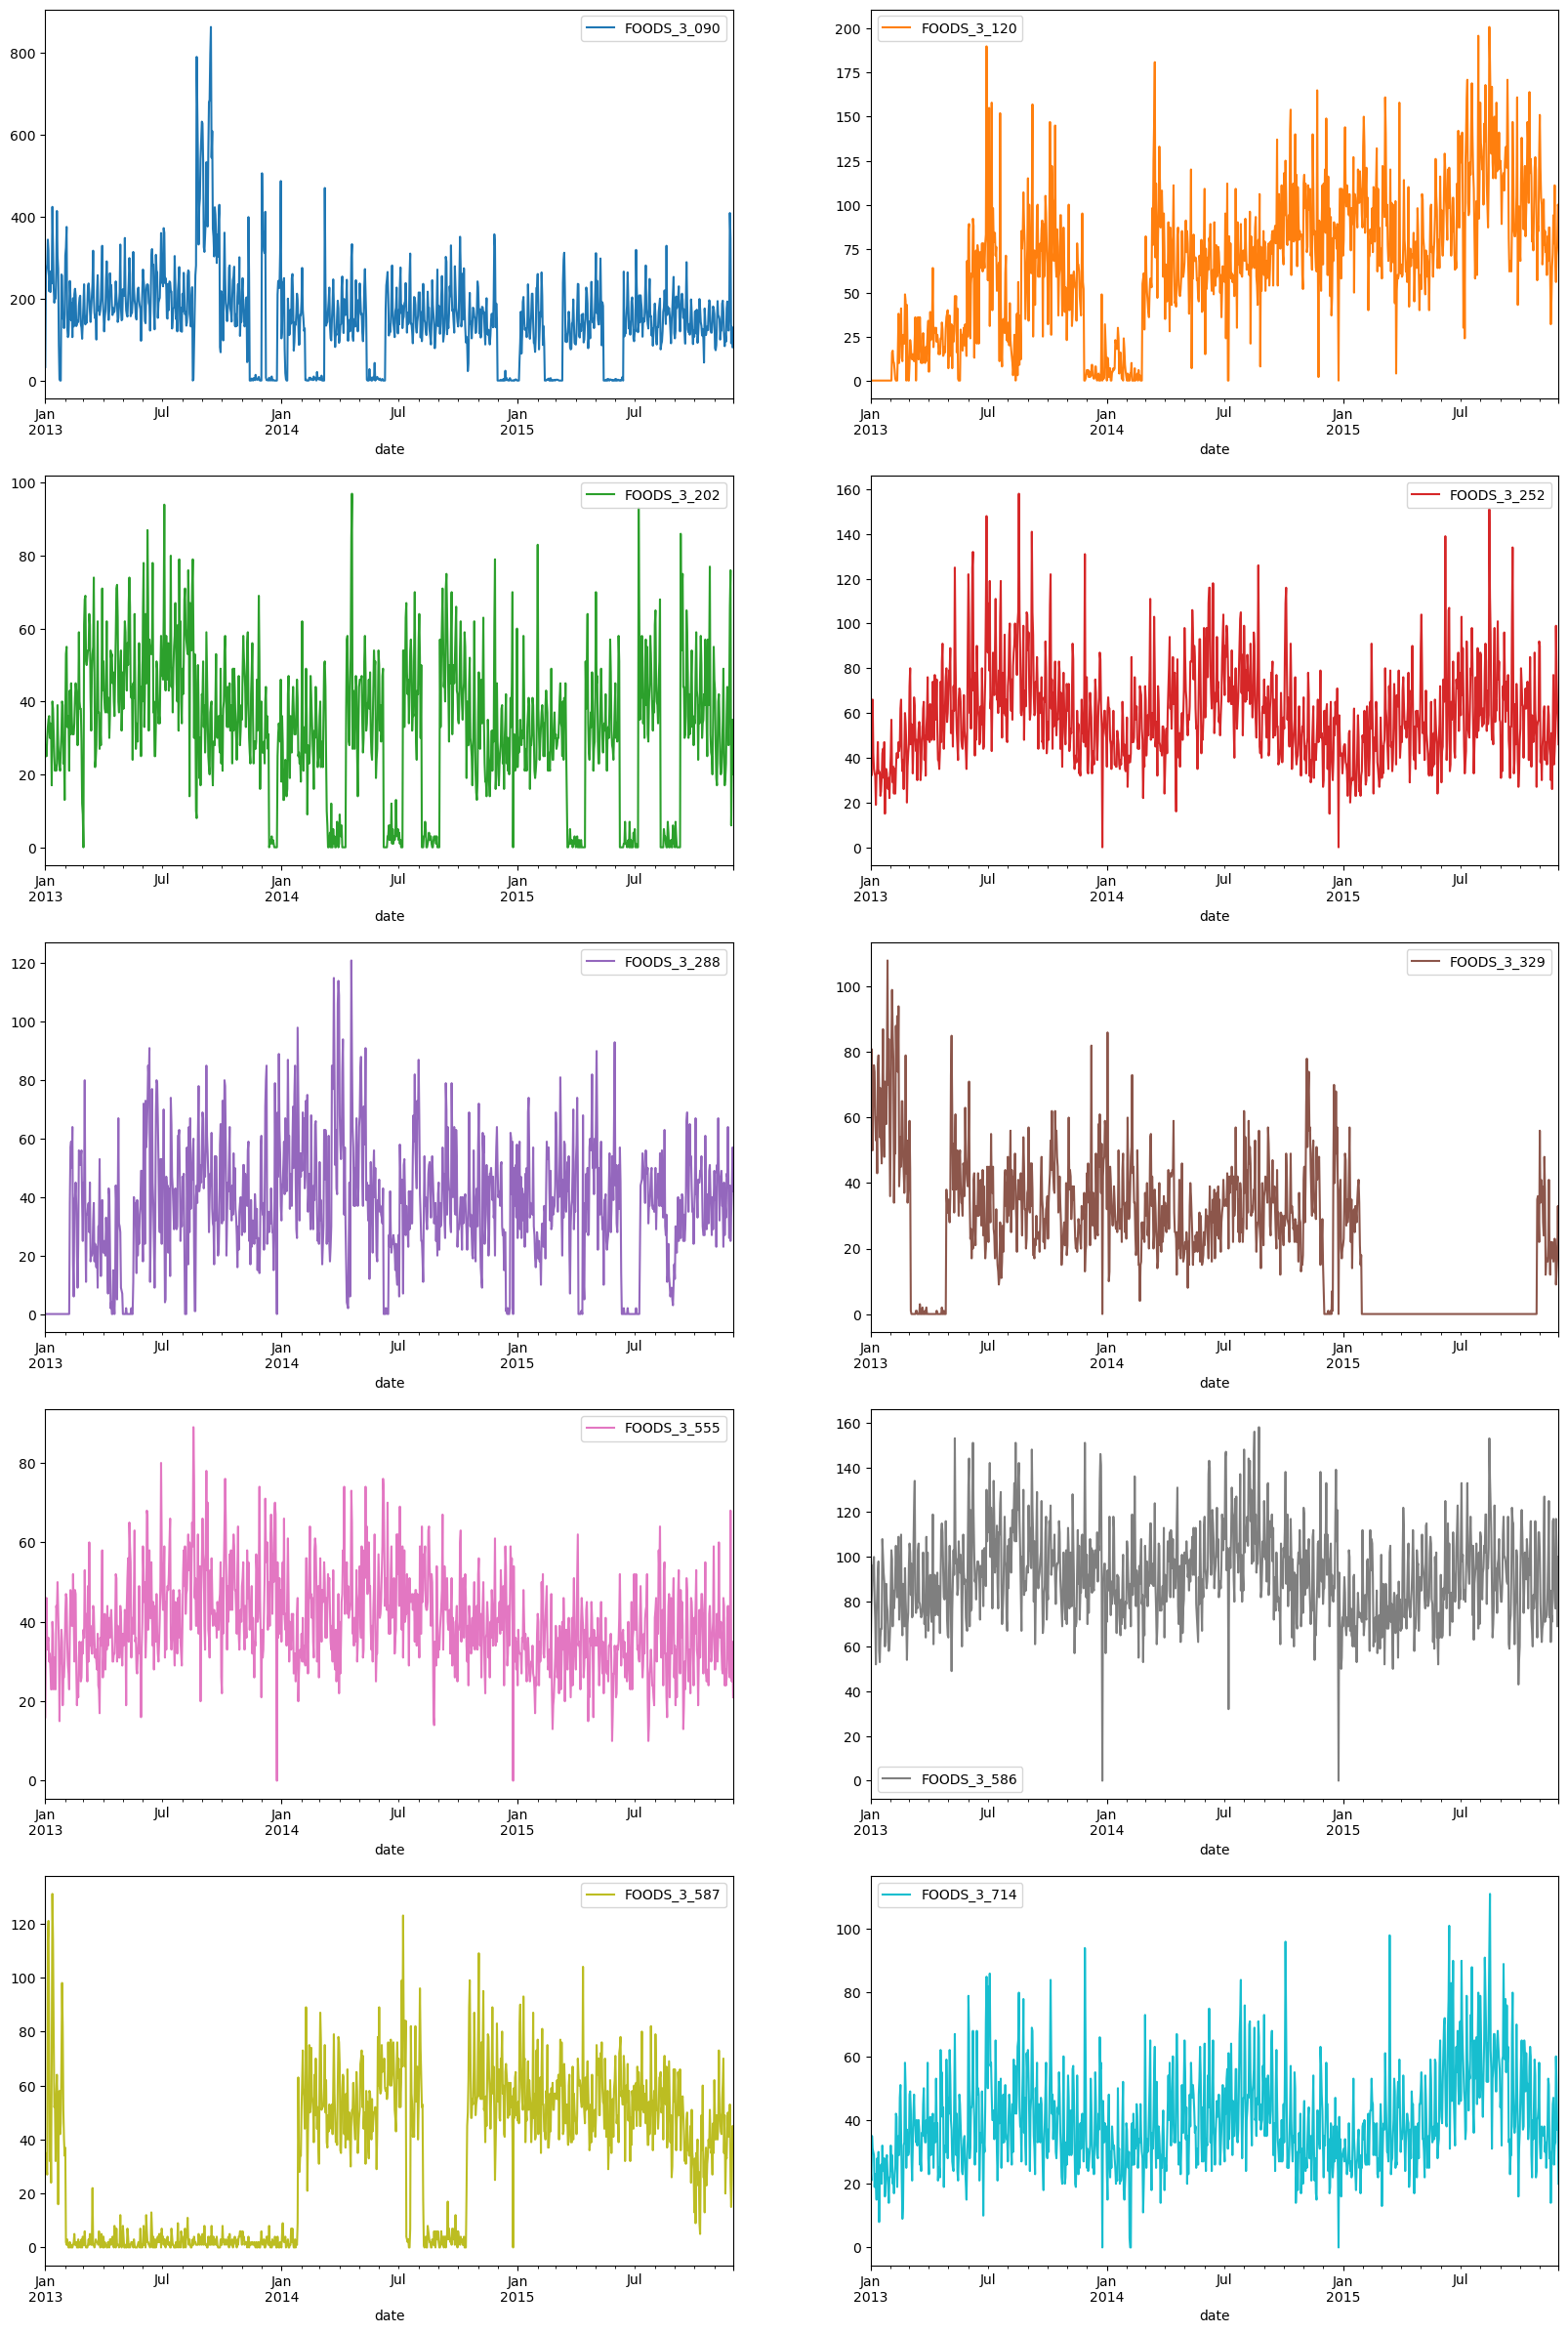

In [18]:
df.groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Tendencia de las ventas por tienda y producto

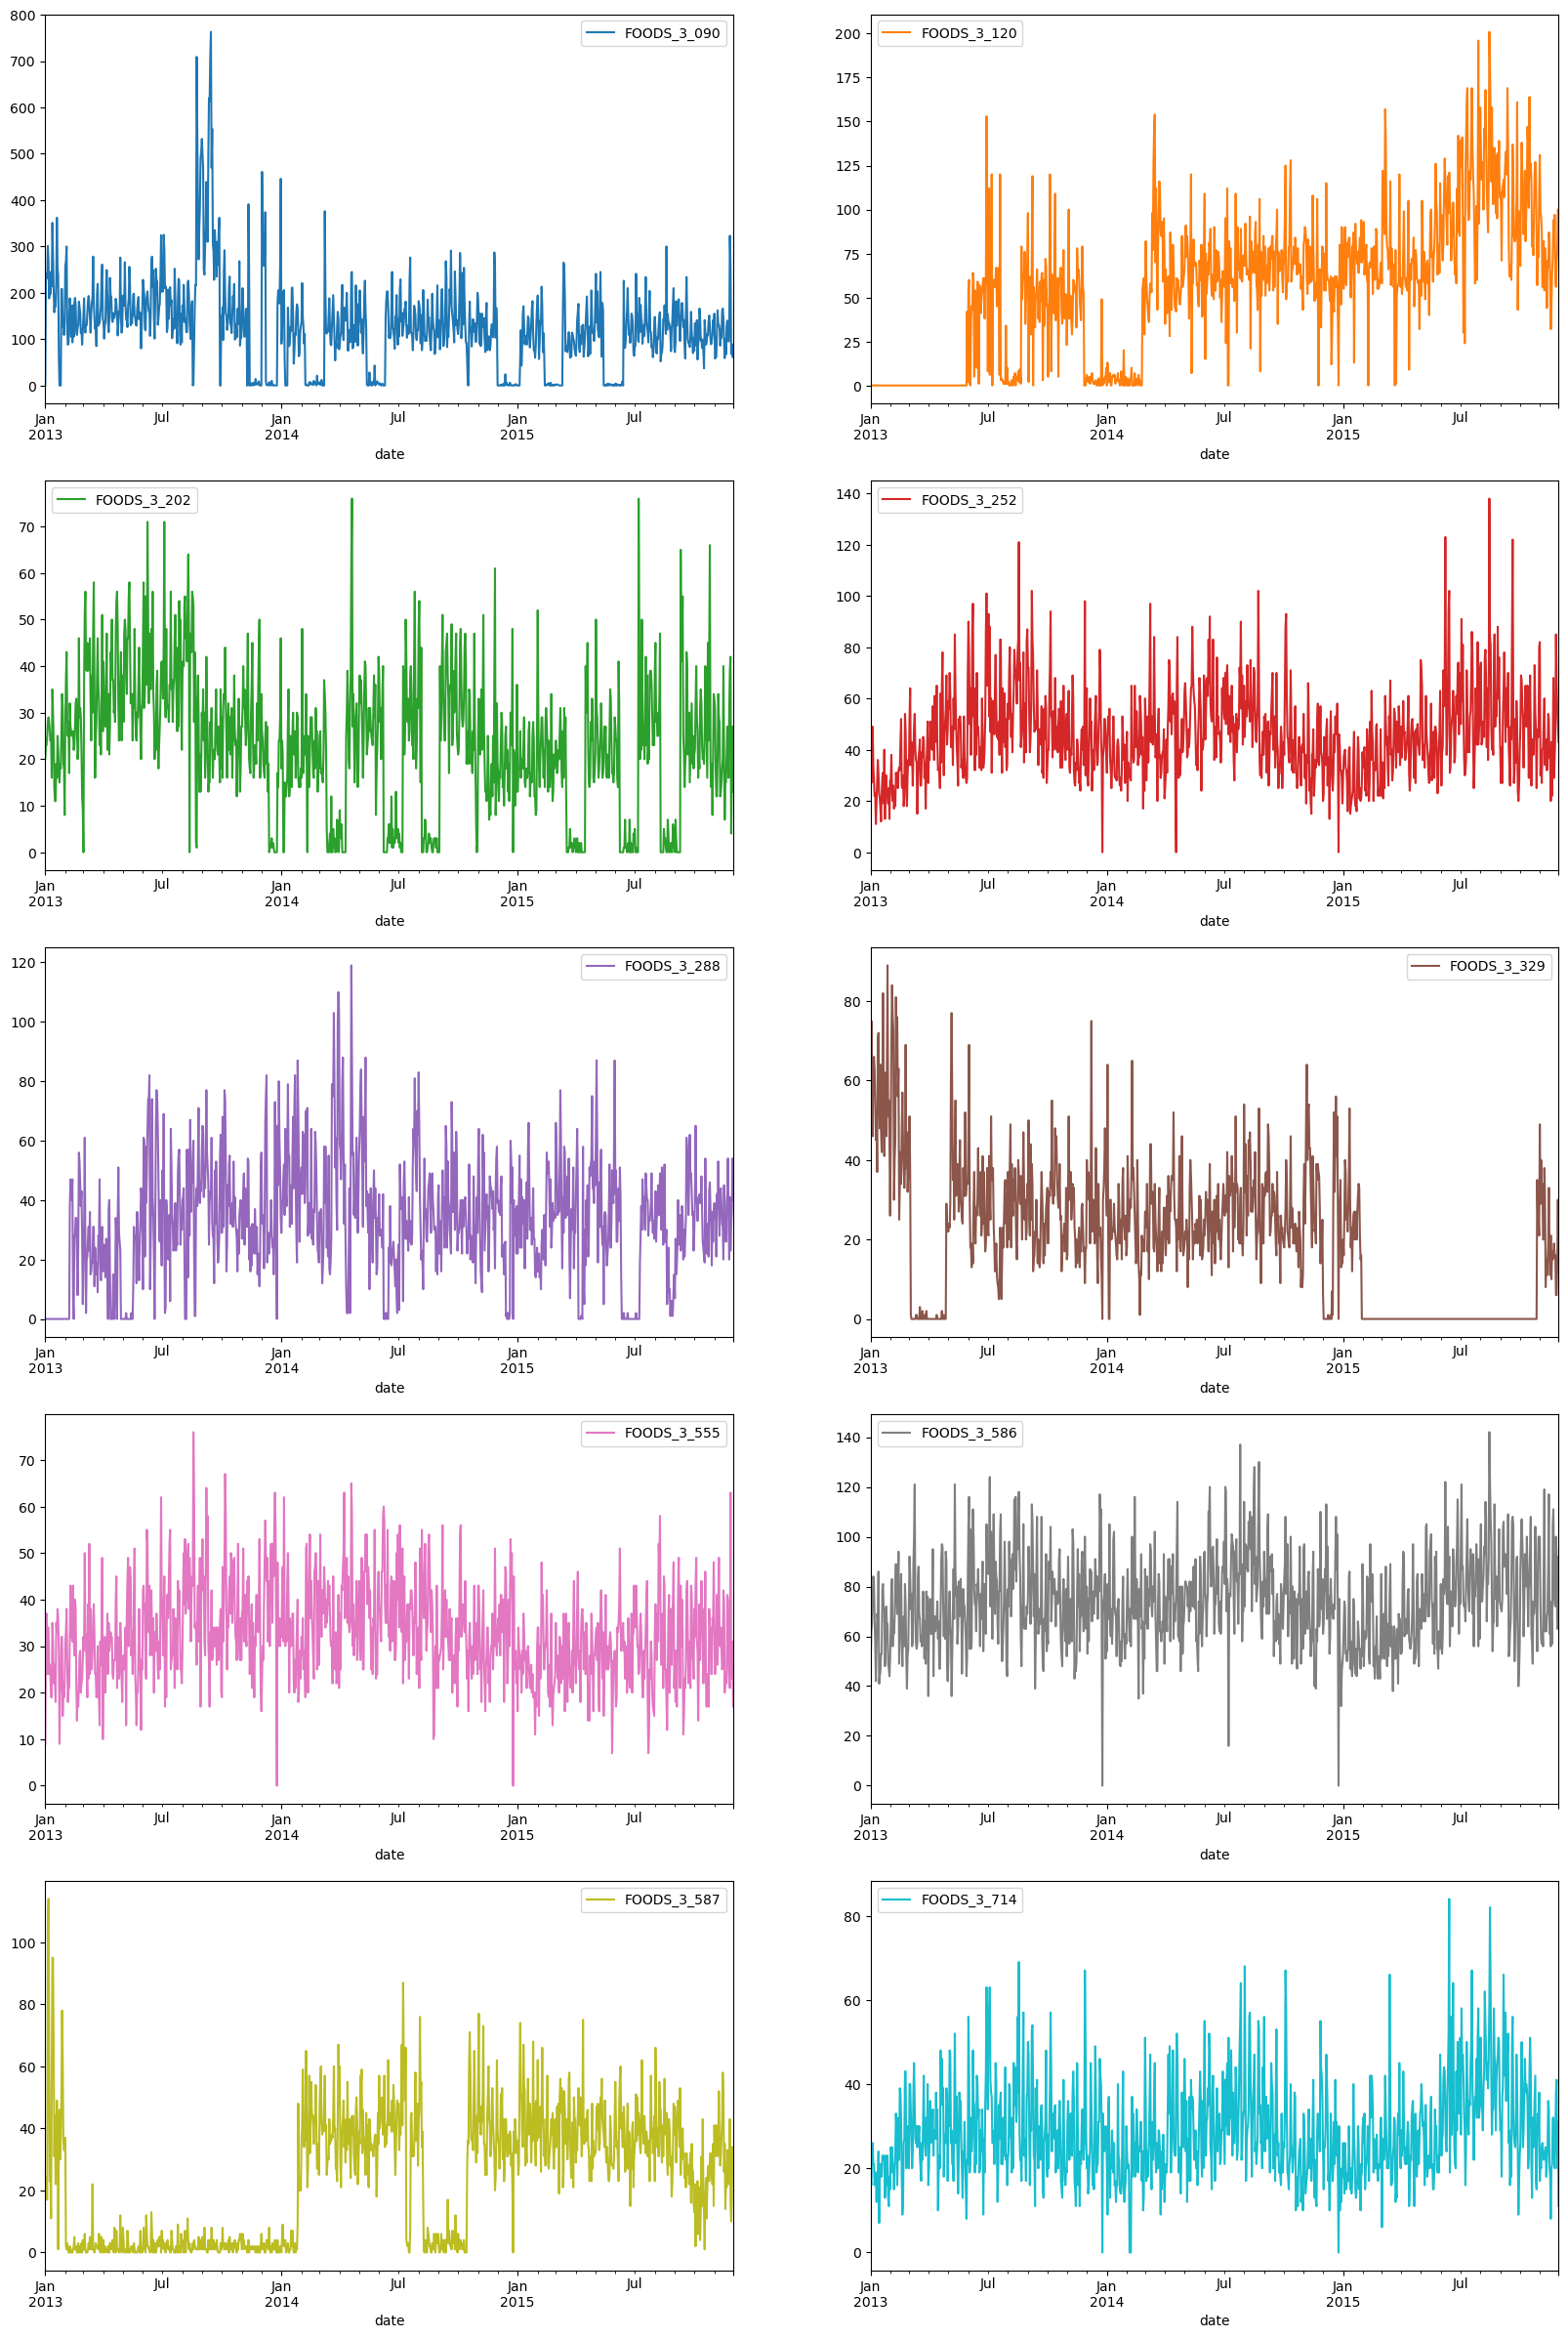

In [19]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

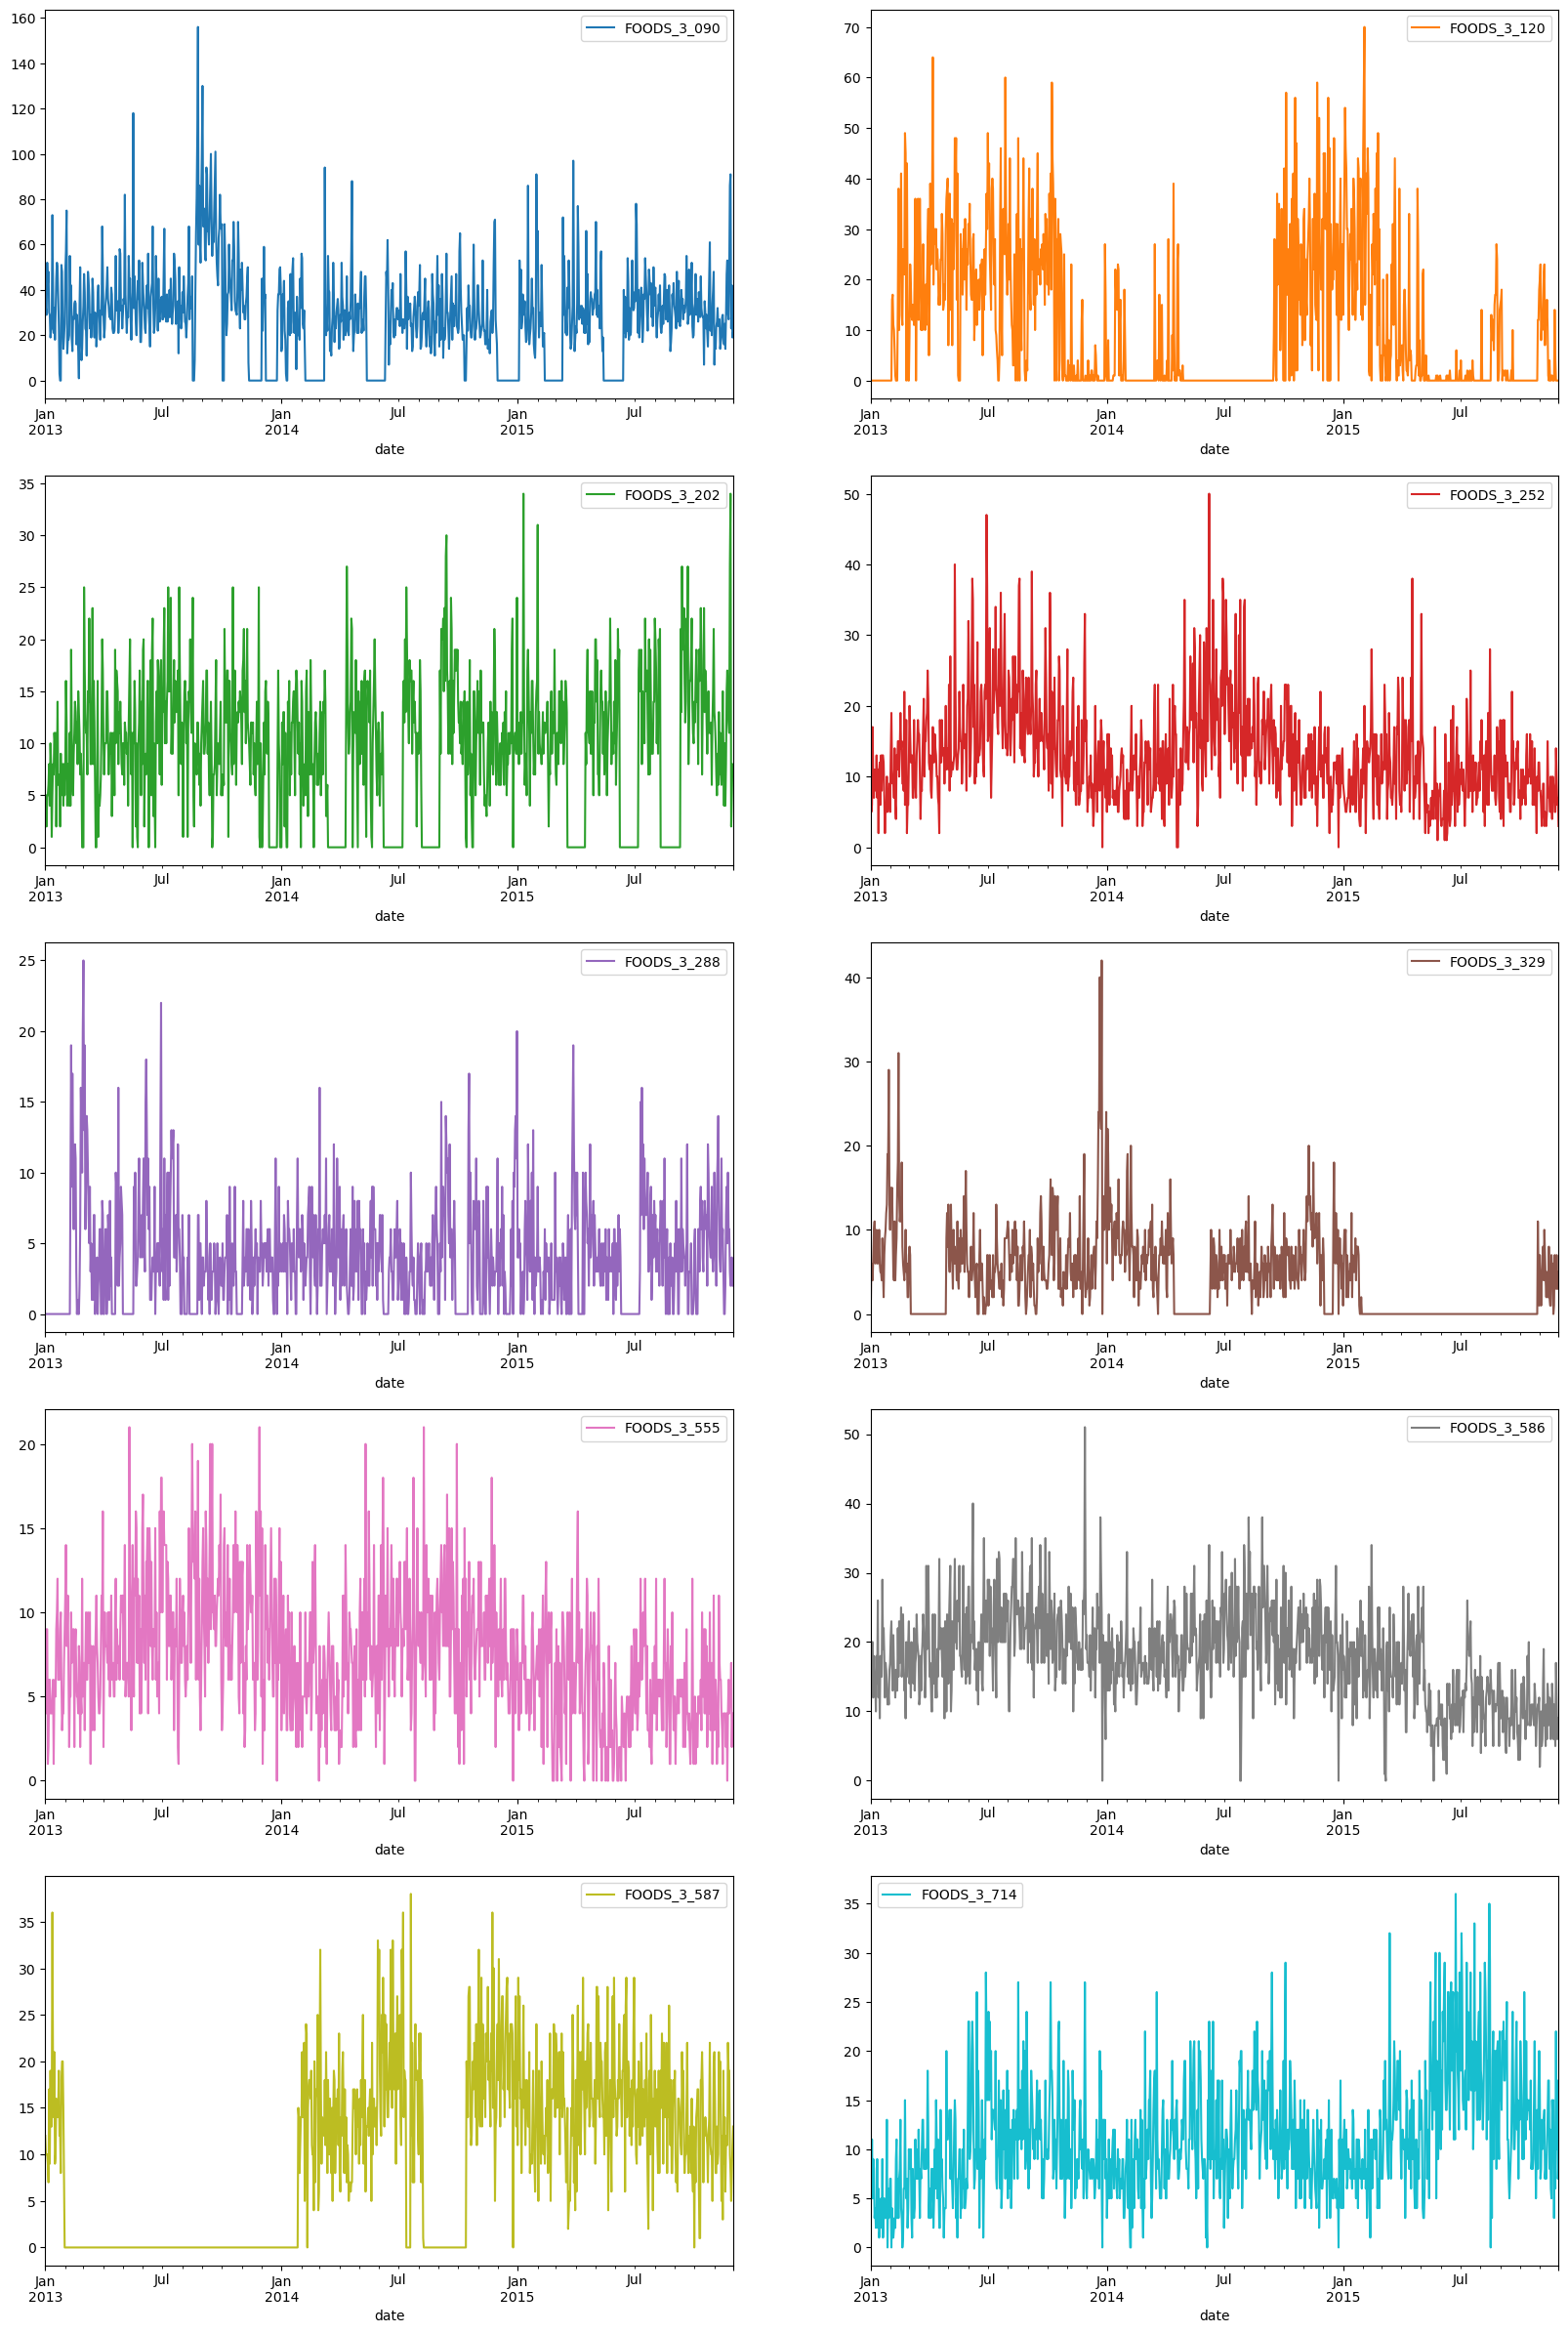

In [20]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).ventas.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusiones:

* Estructura jerárquica
* Hay productos nuevos a nivel de tienda
* Aunque no a nivel general, por lo que podríamos pensar que no son realmente productos nuevos si no demanda intermitente
* Hay demanda intermitente
    * No sabemos la causa: falta de demanda, retirada del mercado o rotura de stock

Acciones:

* Modelizar a nivel tienda producto
* Crear una variable que capture el efecto de la demanda intermitente
* Utilizar algoritmos basados en árboles y rápidos: XGBoost o lightGBM

#### Tendencia del precio por producto

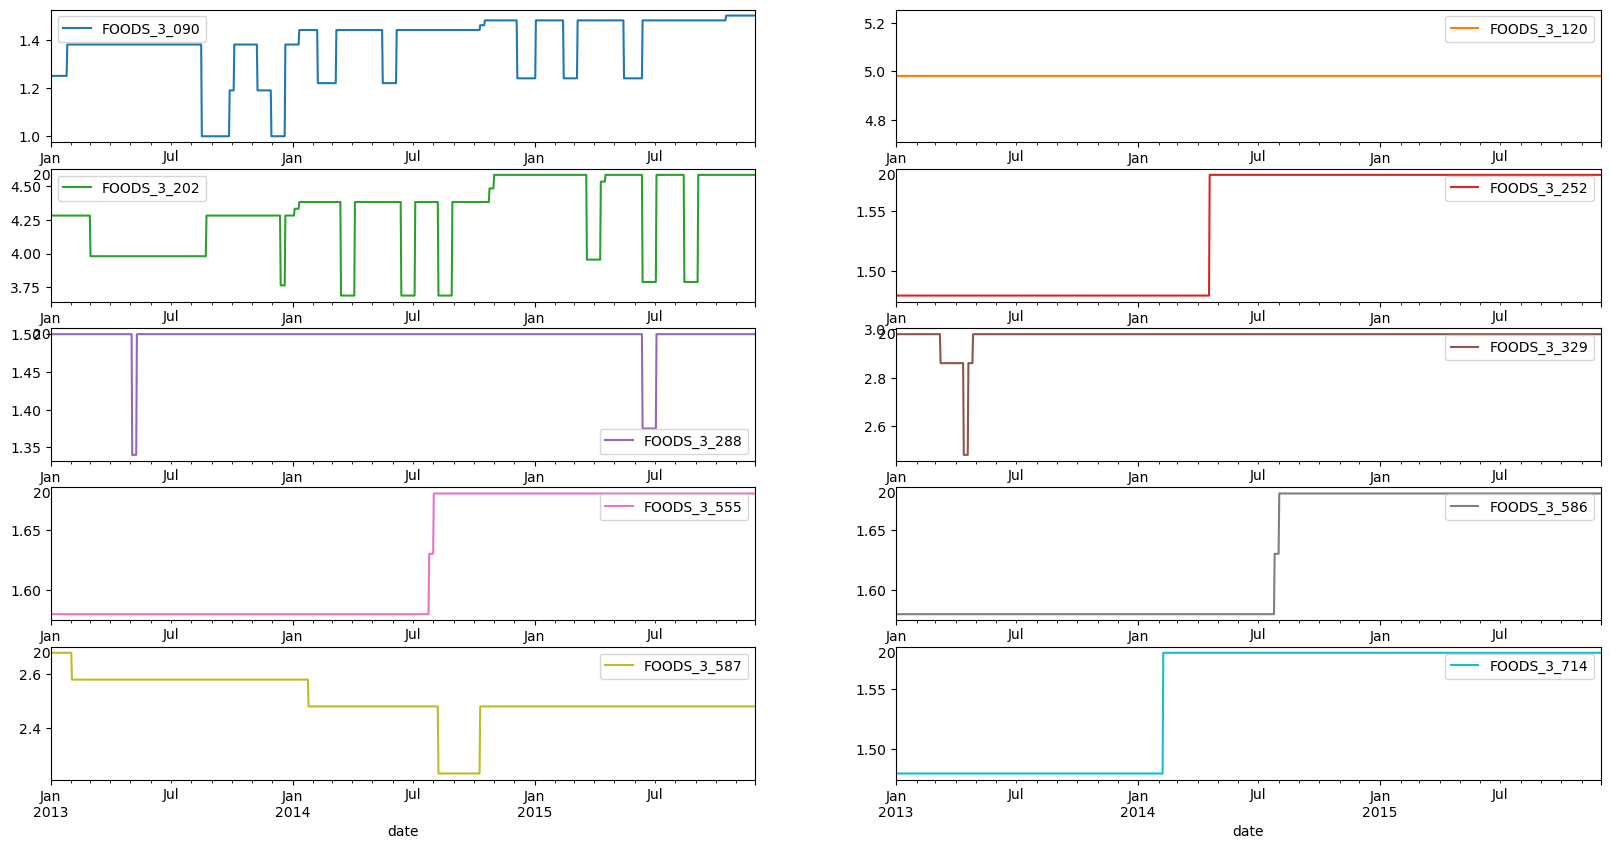

In [21]:
df.groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

Conclusiones:

* Las políticas de precio varían mucho por producto
* Parece que las promociones son frecuentes
* Sería muy útil disponer de un calendario de promociones

#### Estacionalidad por producto

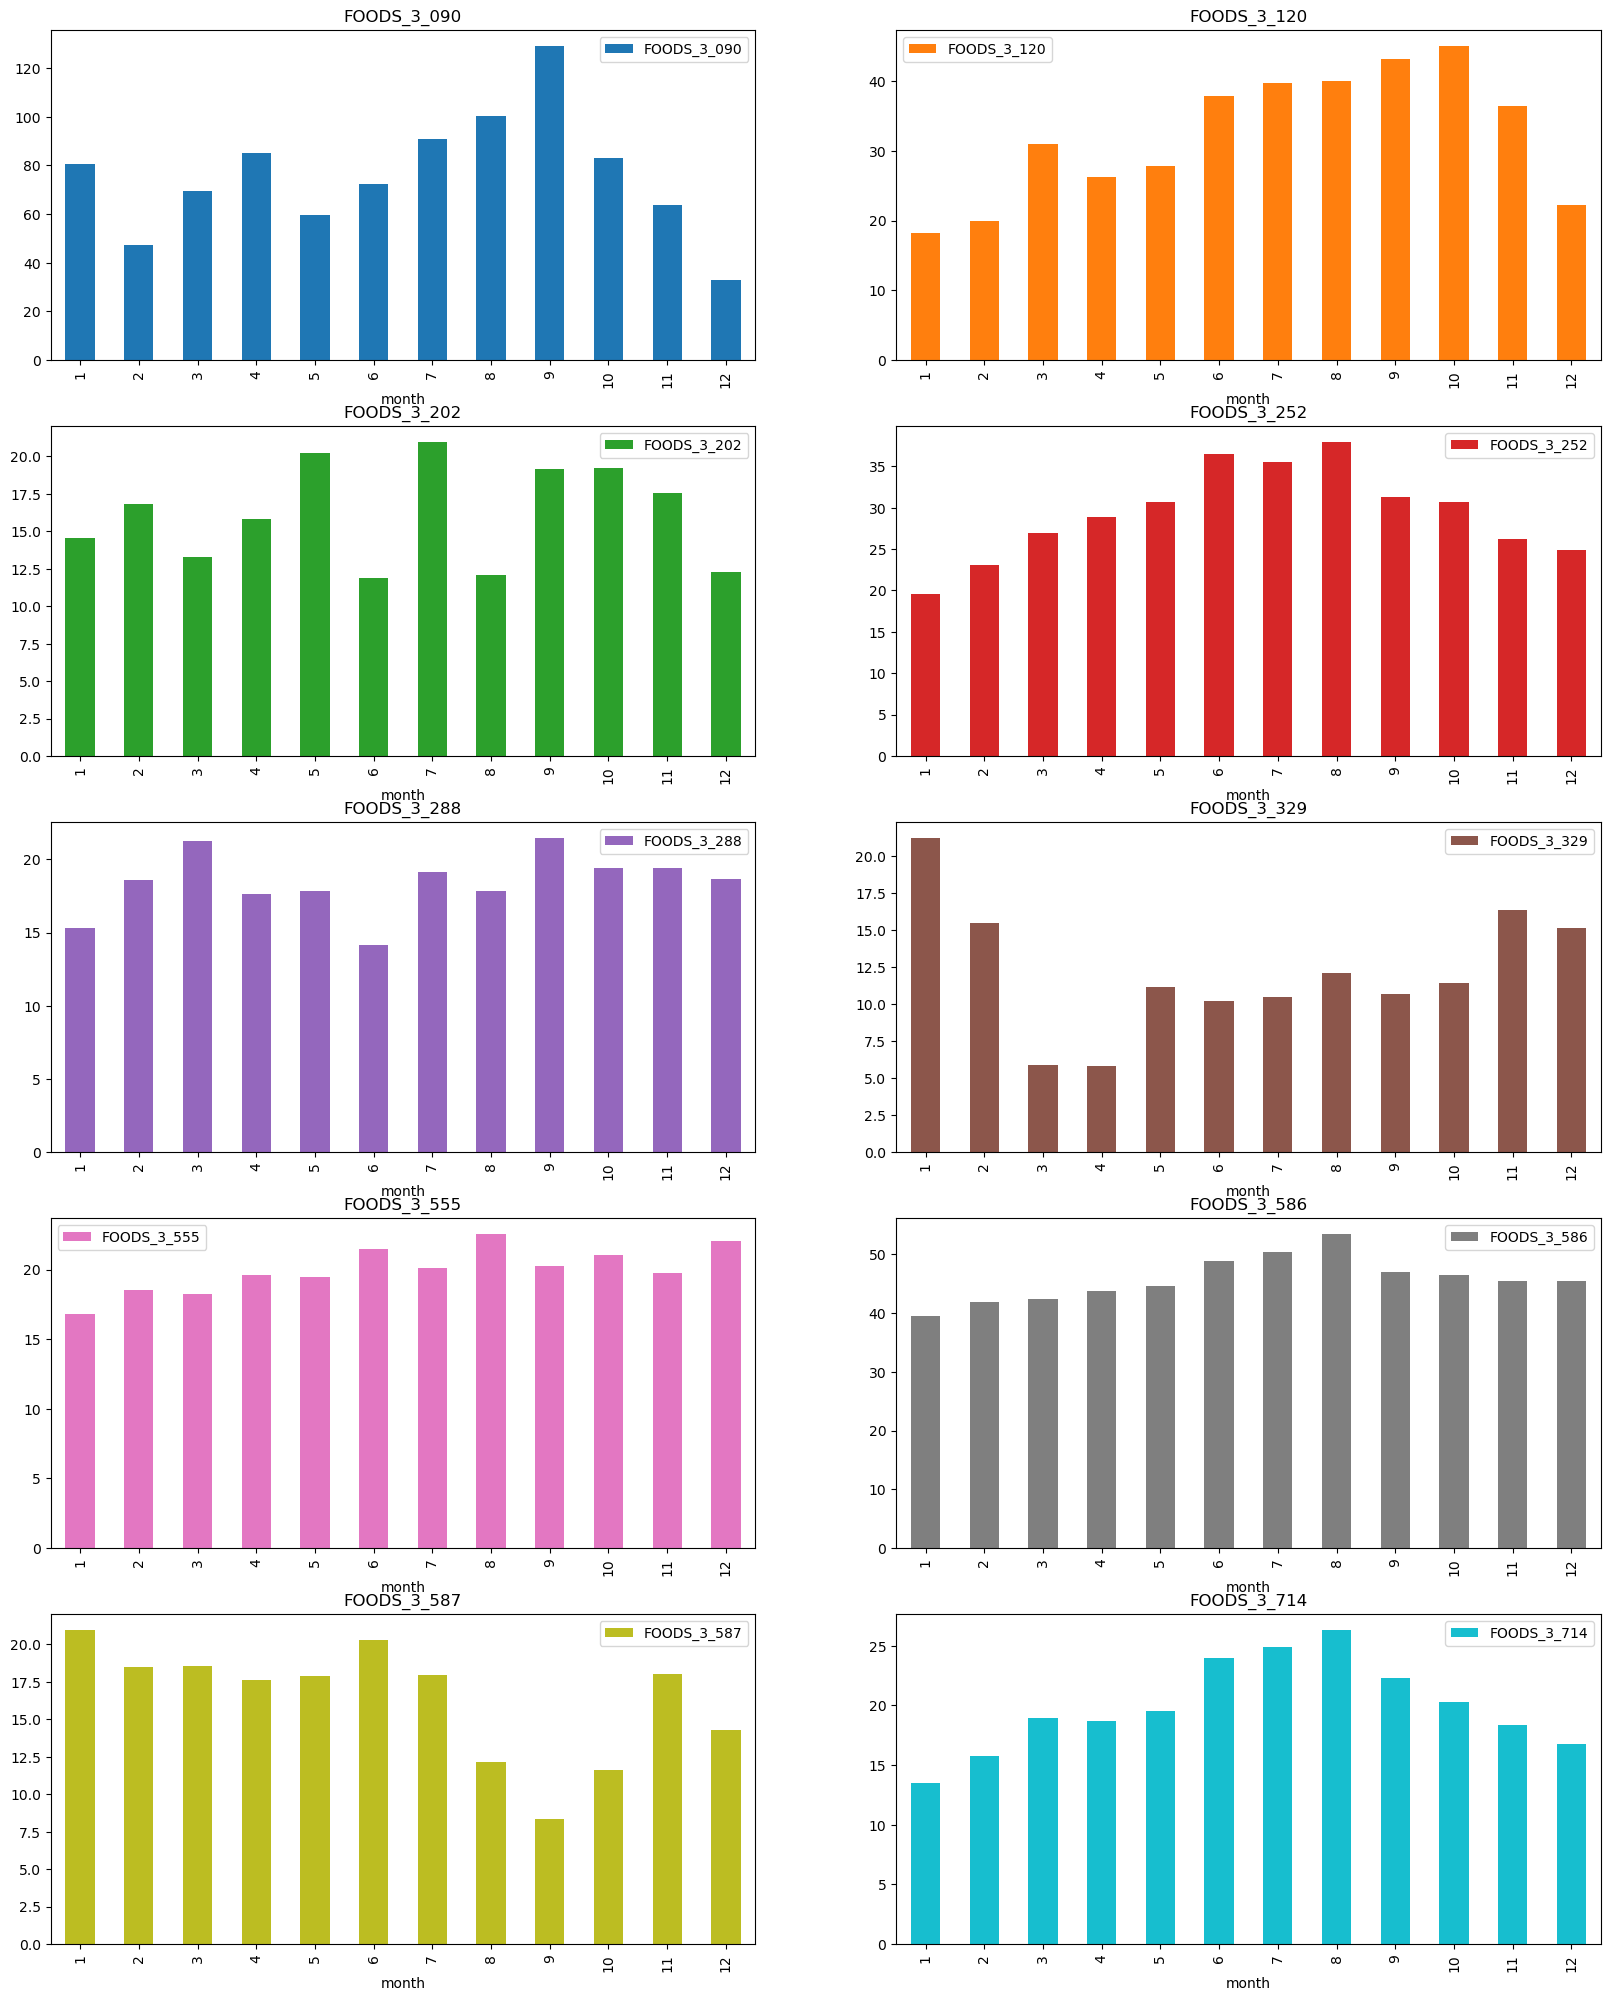

In [22]:
df.groupby(['month','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

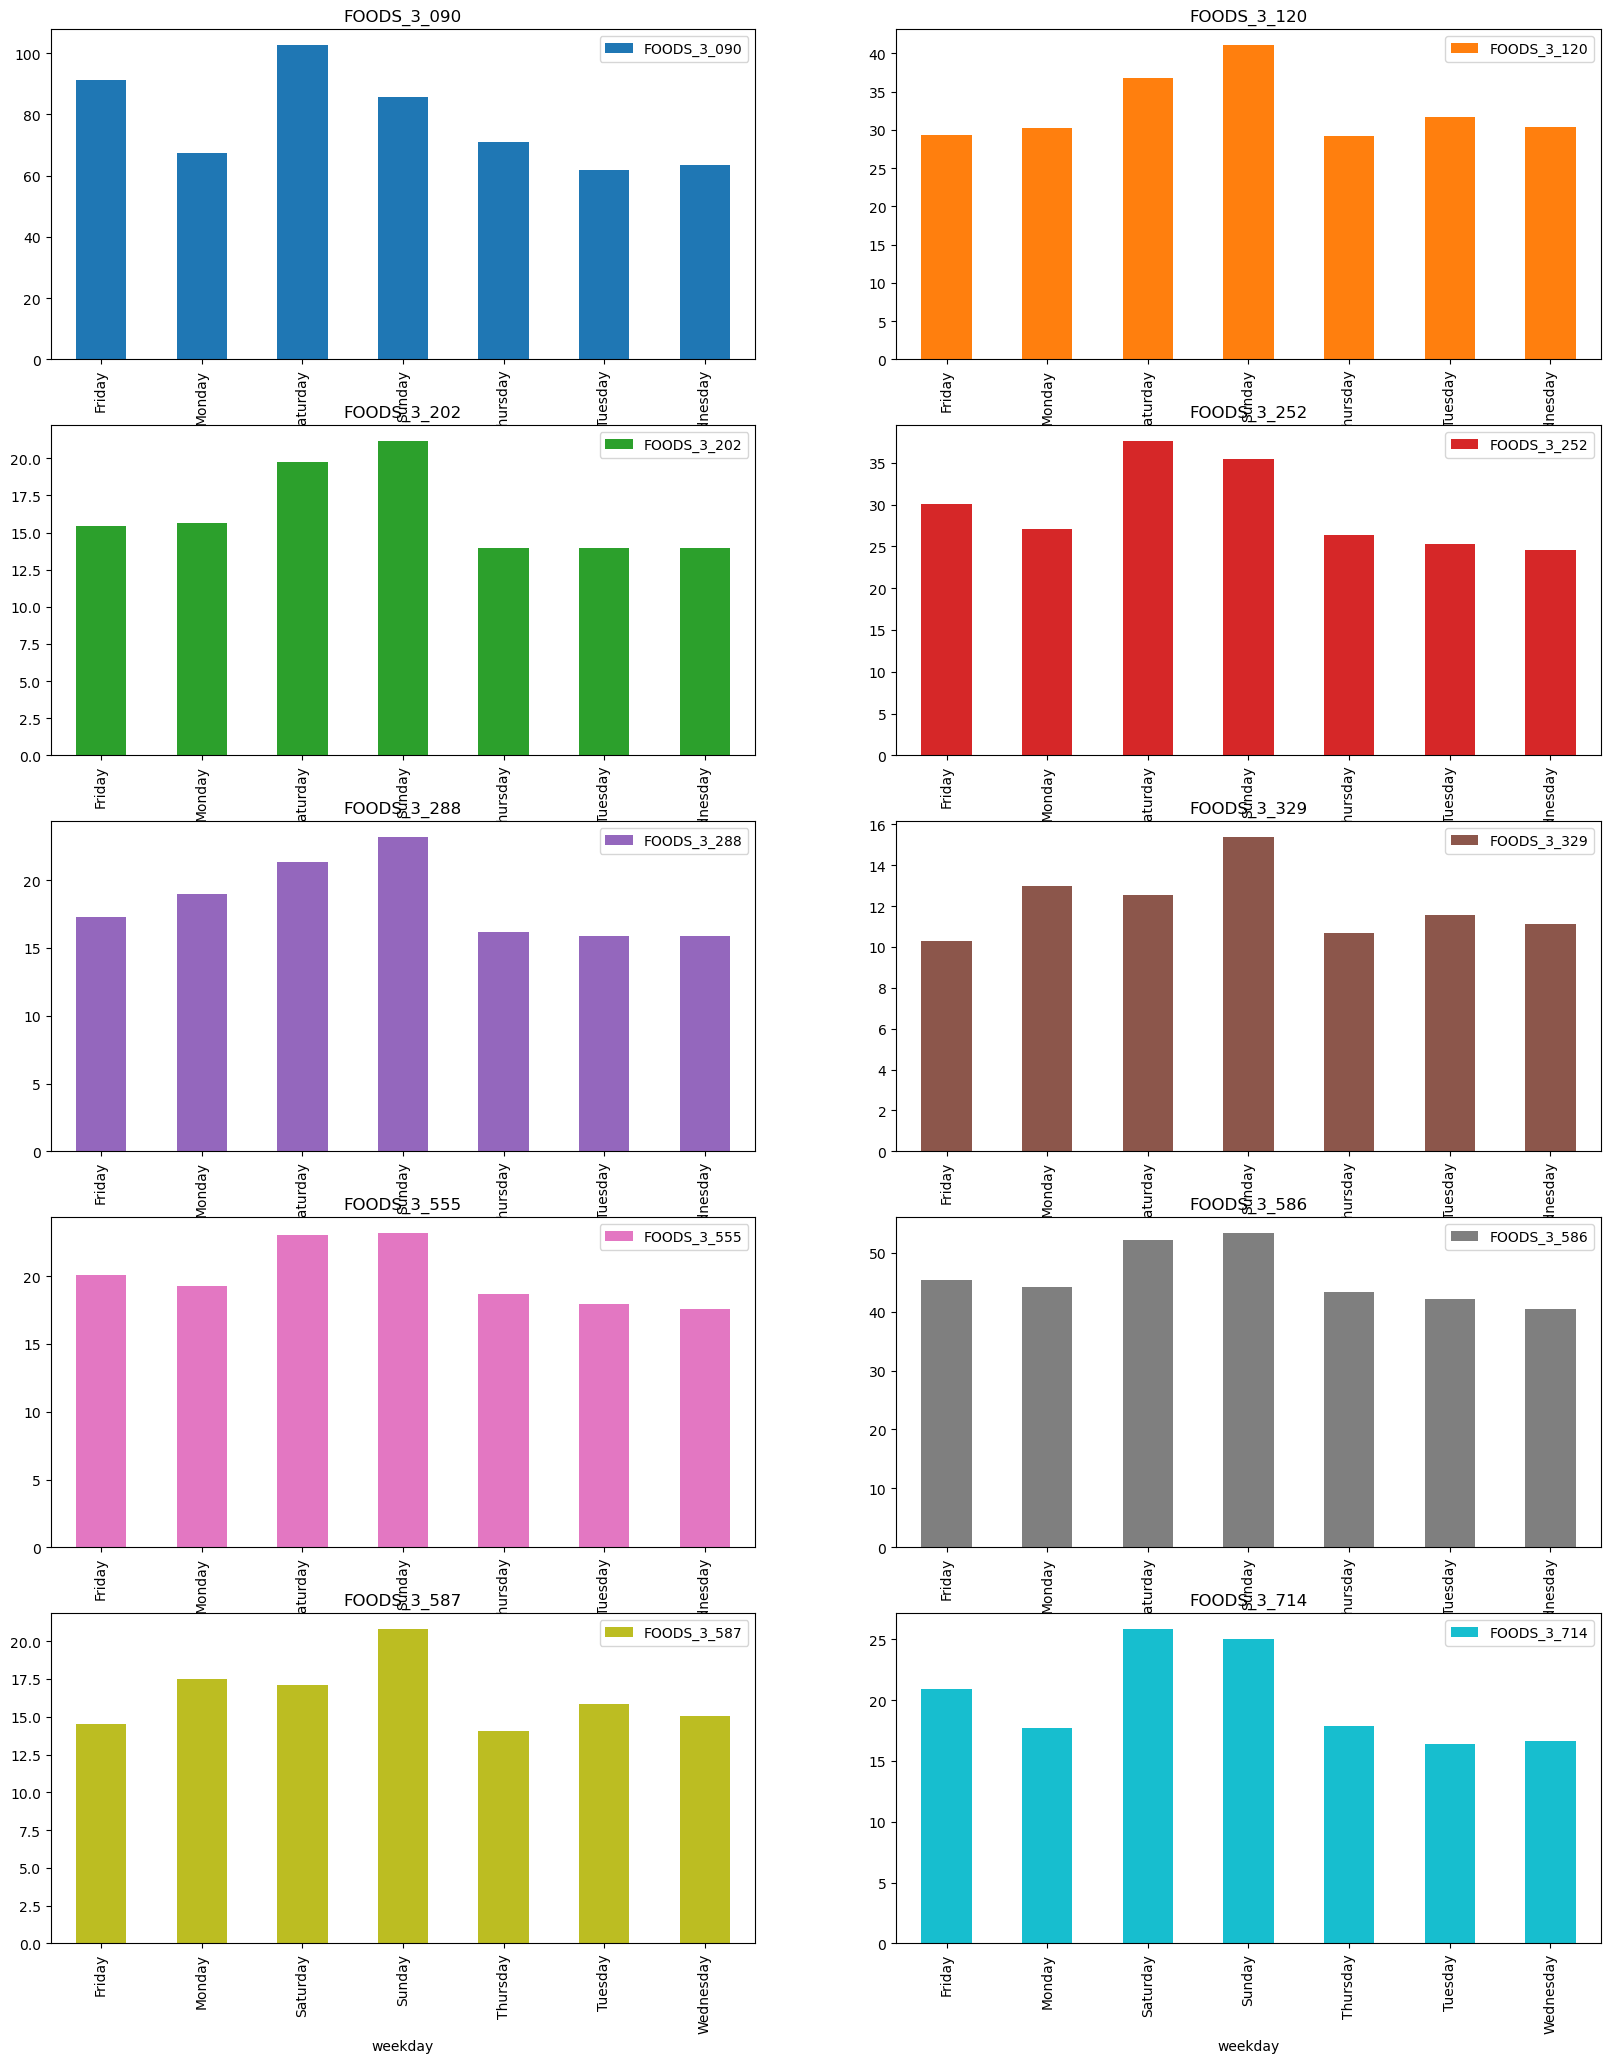

In [23]:
df.groupby(['weekday','item_id']).ventas.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Estacionalidad por evento

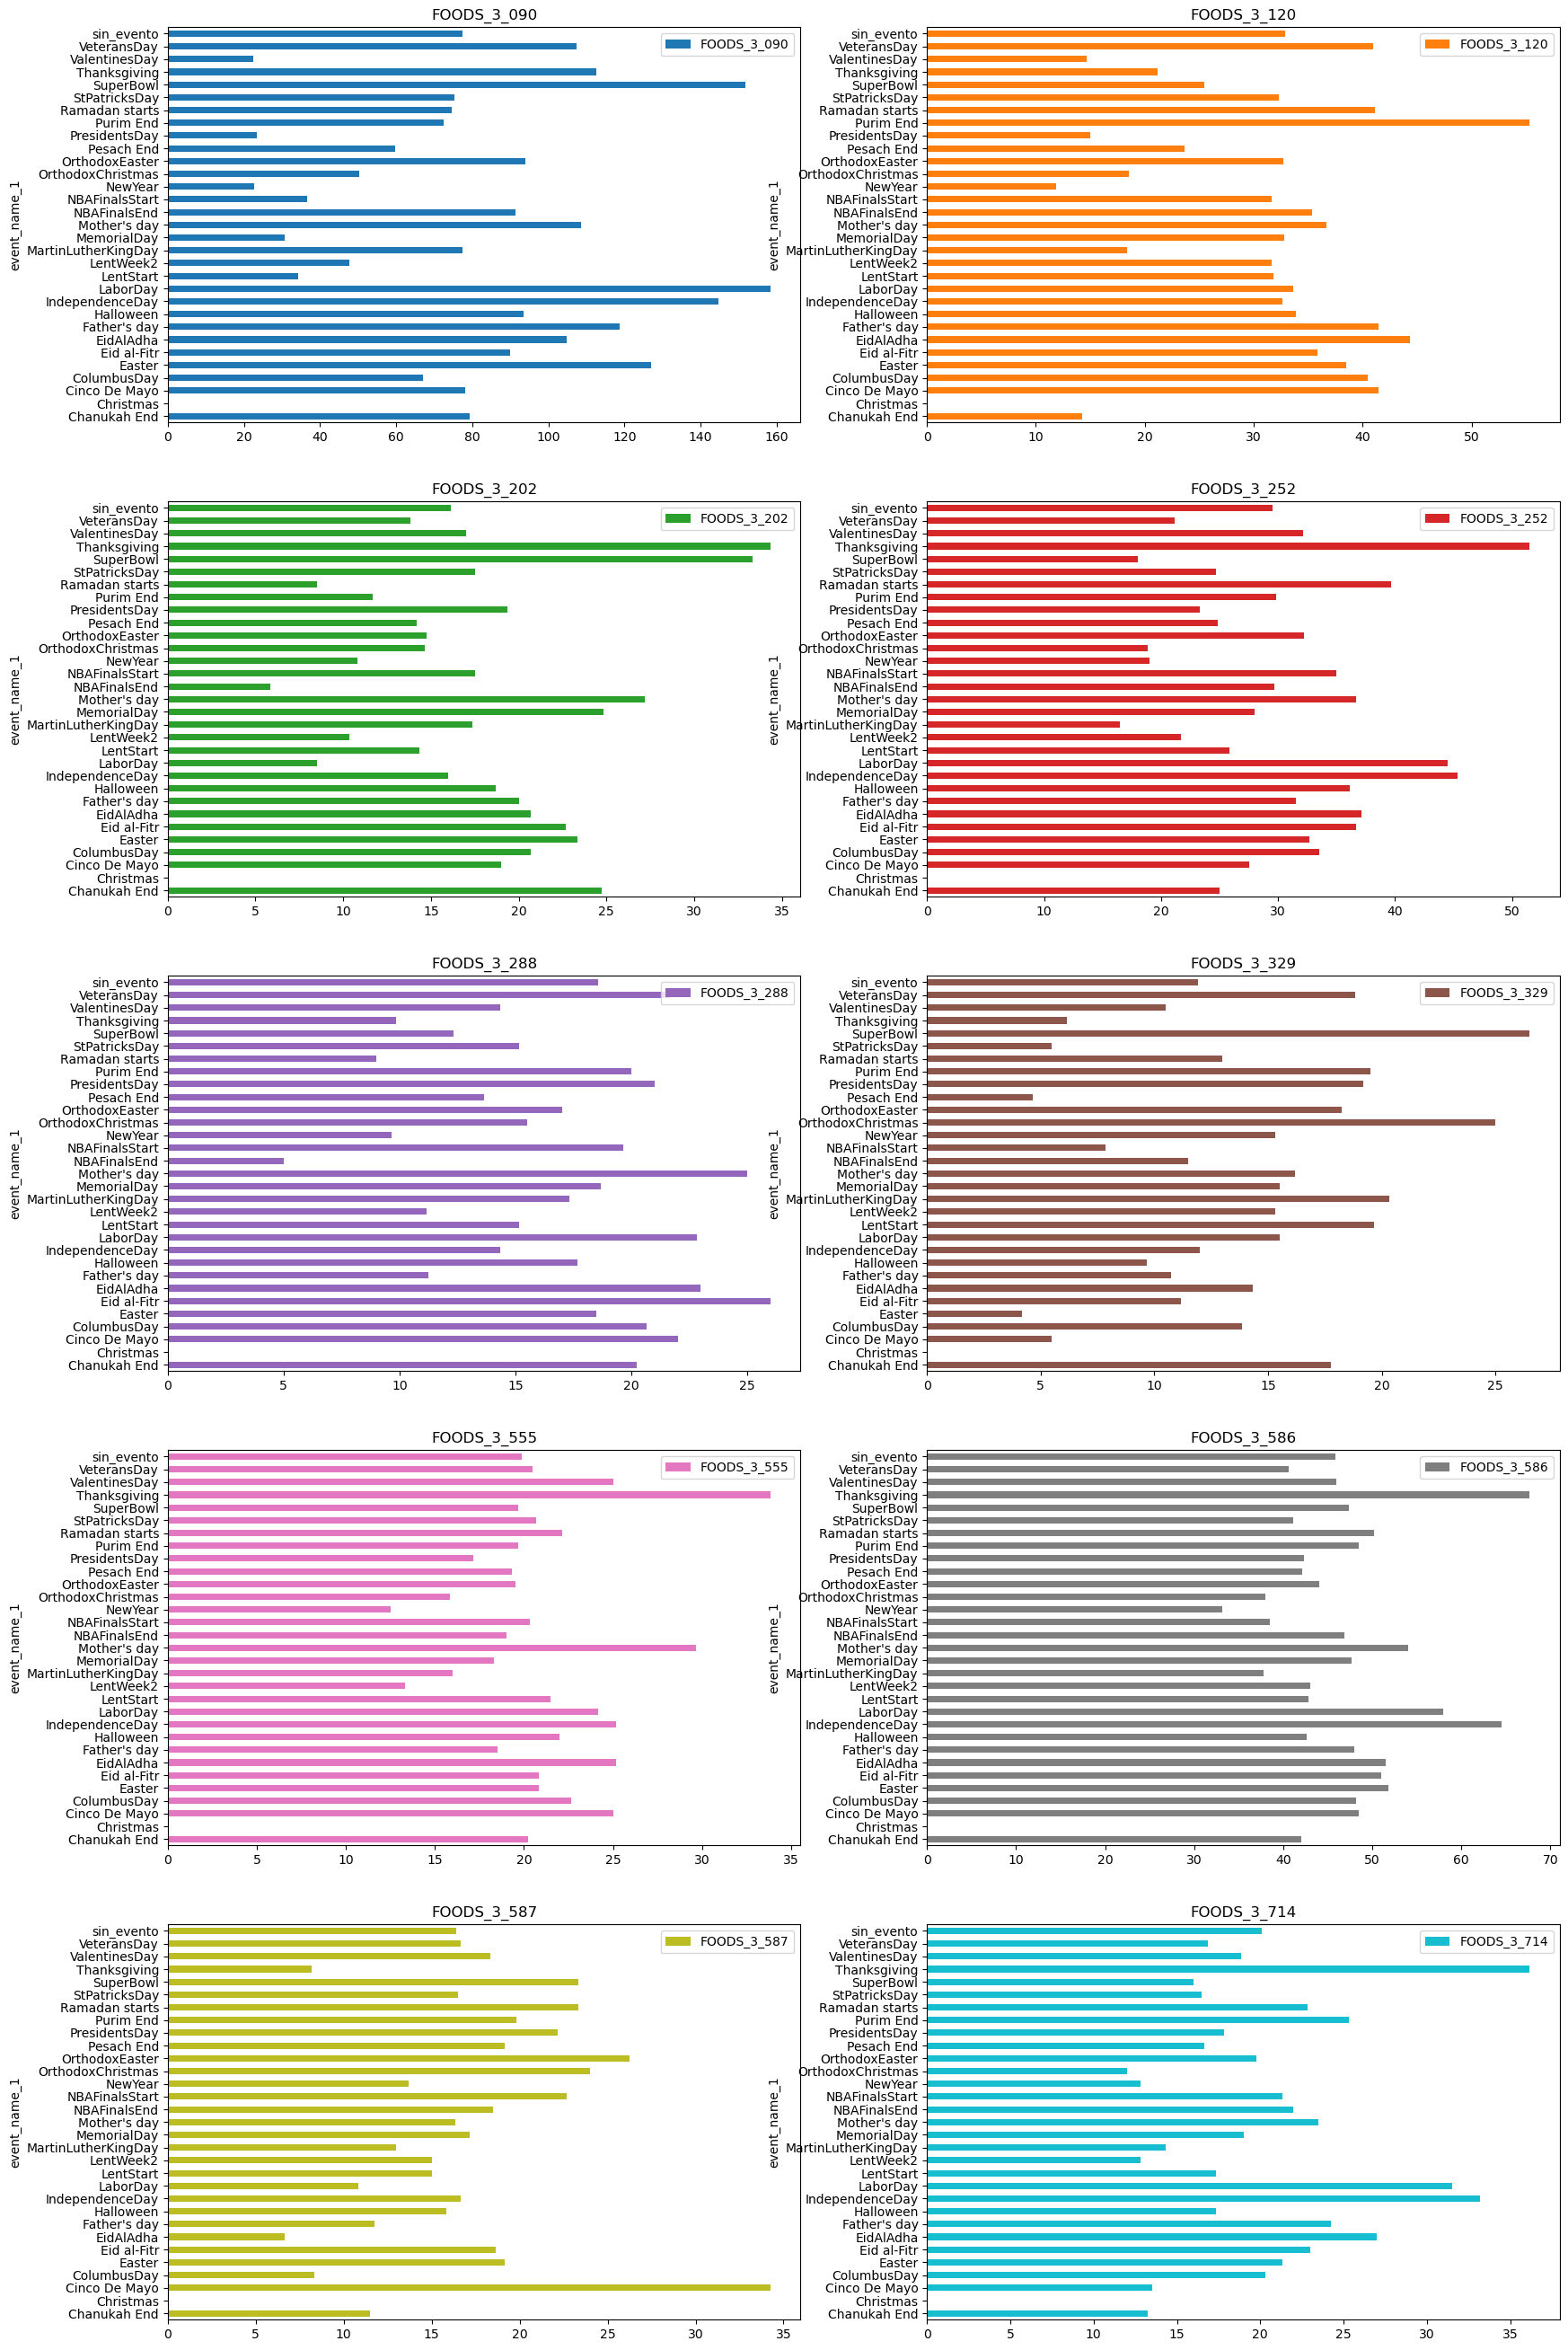

In [24]:
df.groupby(['event_name_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Estacionalidad por tipo de evento

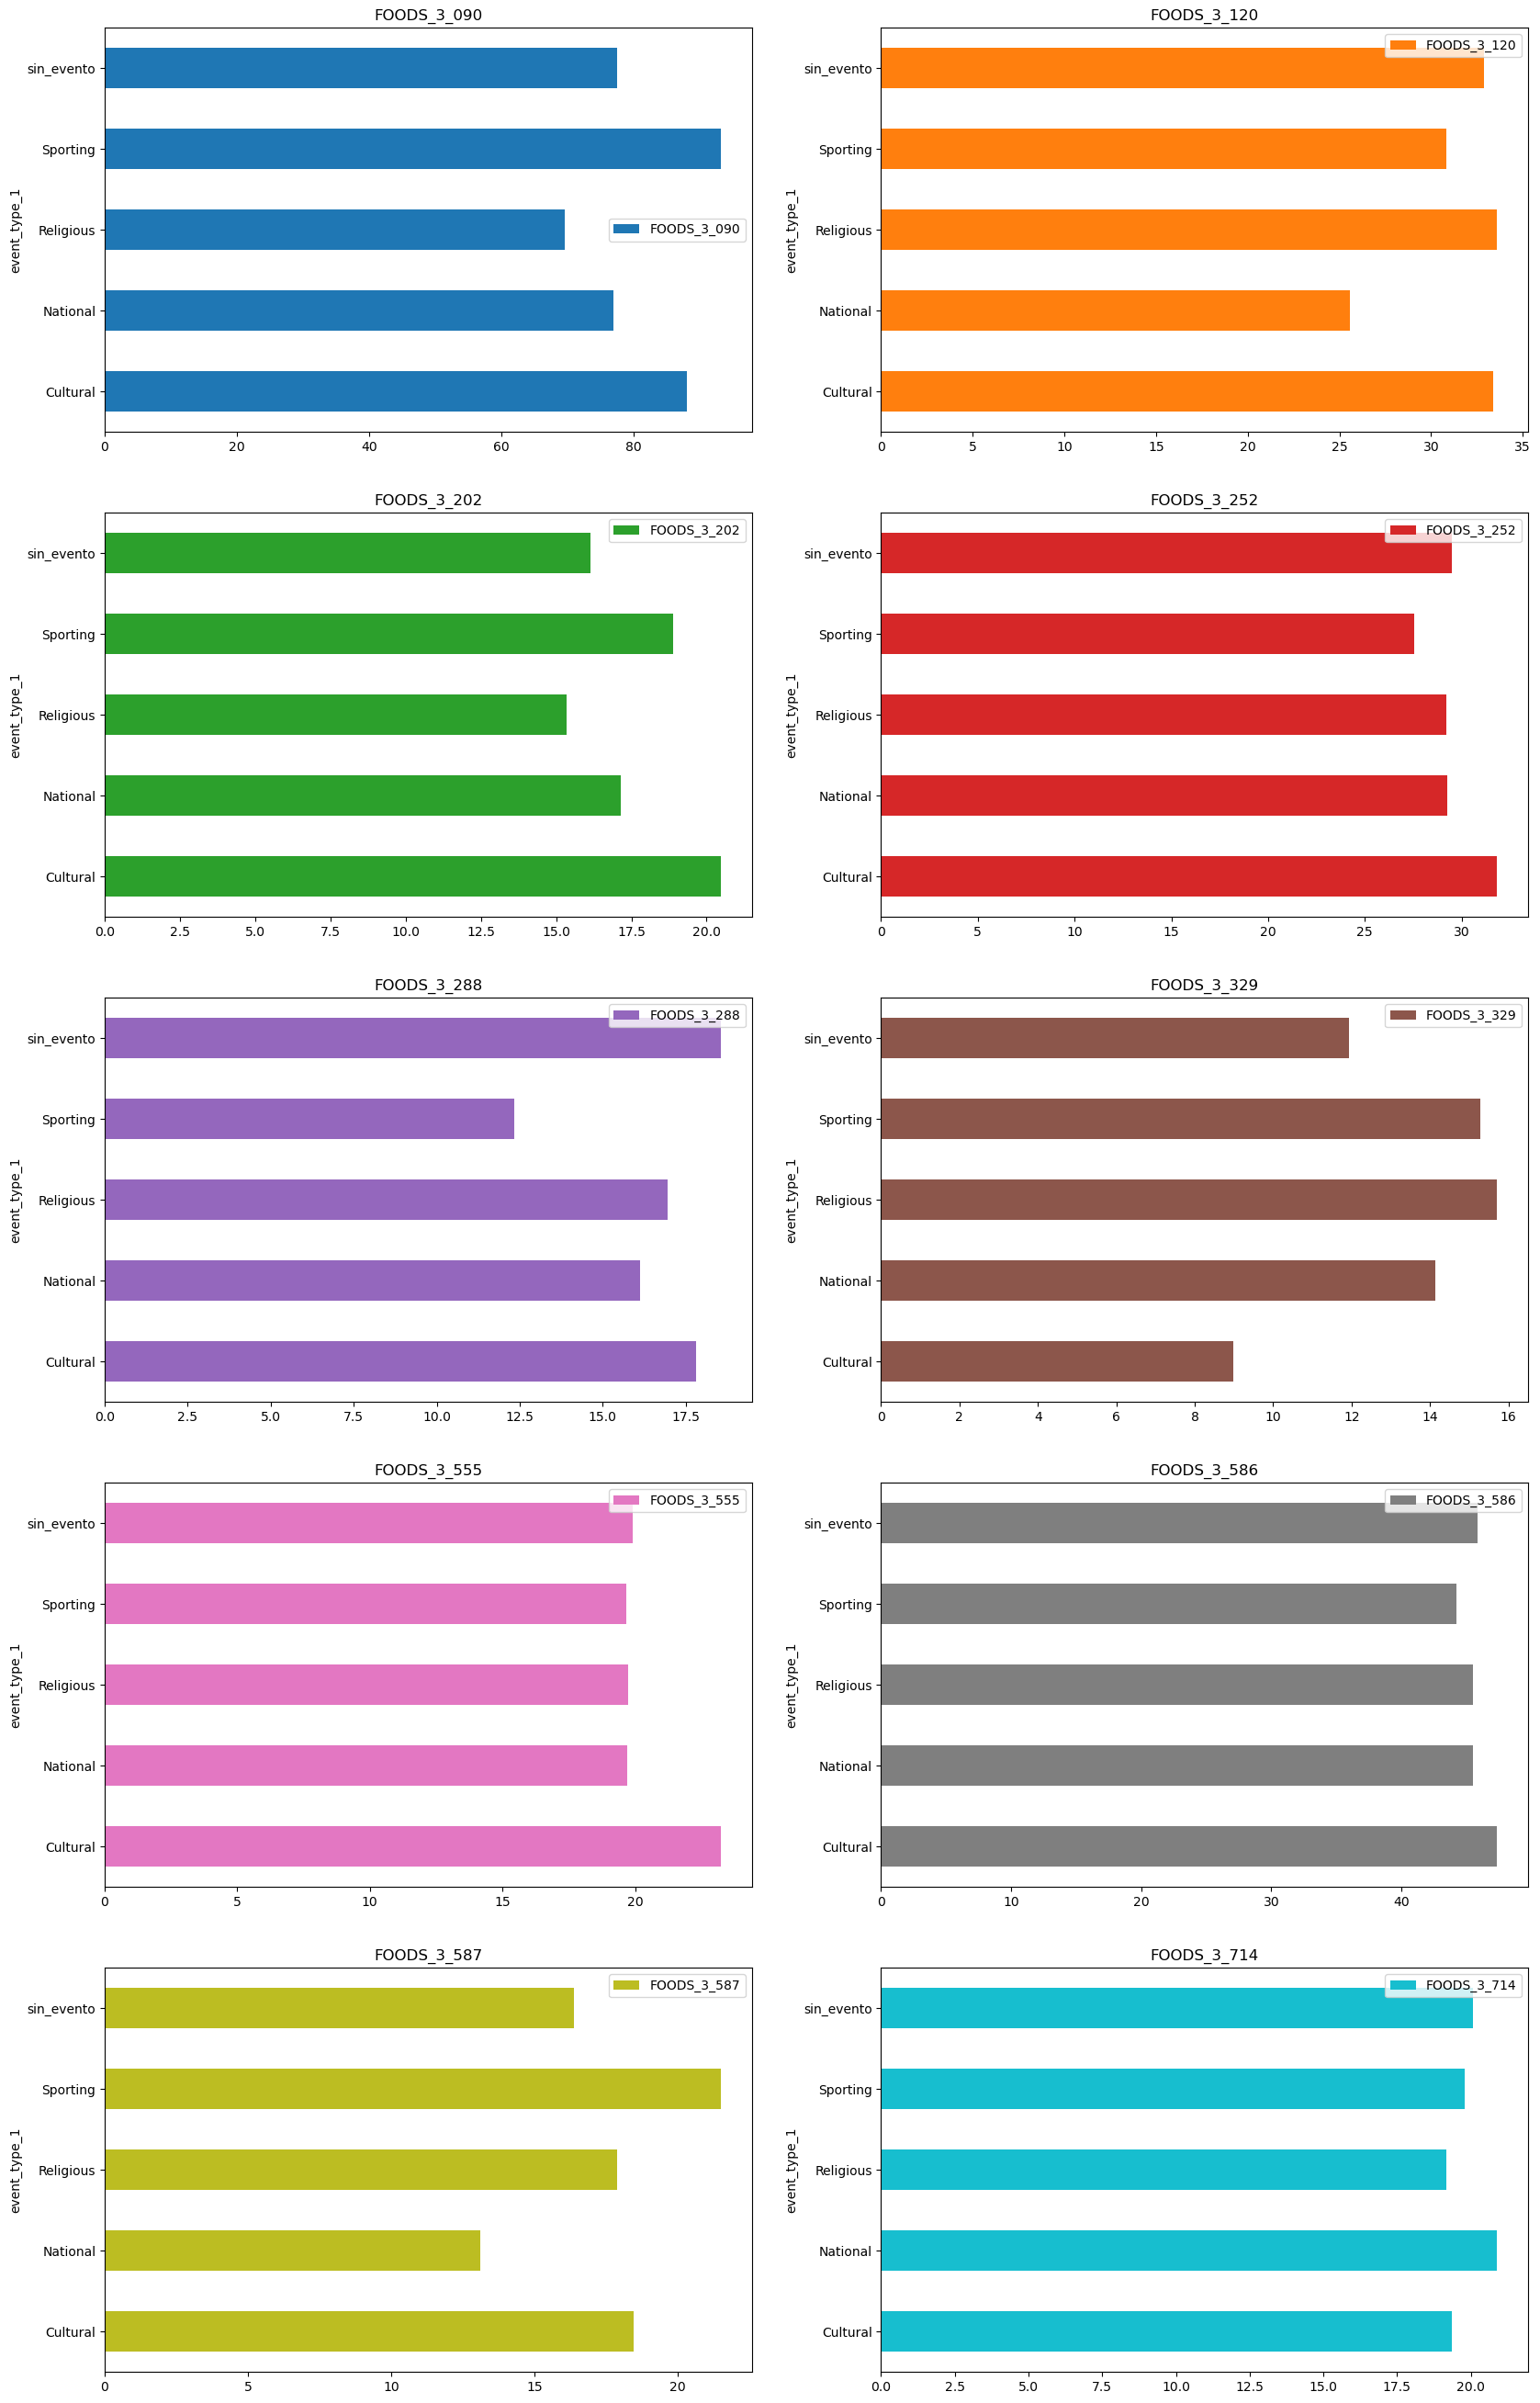

In [25]:
df.groupby(['event_type_1','item_id']).ventas.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusiones:

* Todas estas variables sí parecen afectar lo cual es buena noticia

## GUARDAR DATASETS TRAS CALIDAD DE DATOS

Guarda los avances en cat y num con un sufijo para poder guardar o recuperar avances del proyecto.

En formato pickle para no perder las modificaciones de metadatos.

*NOTA: En algunos casos no hay cambios en los ficheros en esta fase, así que este paso es opcional.Pero si no guardas estos ficheros acuérdate de modificar la importación en el siguiente notebook.*

In [26]:
#Definir los nombres de los archivos
ruta_cat = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'cat_resultado_eda.pickle'
ruta_num = ruta_proyecto + '/02_Datos/03_Trabajo/' + 'num_resultado_eda.pickle'

In [27]:
#Guardar los archivos
cat.to_pickle(ruta_cat)
num.to_pickle(ruta_num)